In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pylab import * 
import pylab as plab
from pandas.plotting import scatter_matrix
import seaborn as sns
import folium
from branca.colormap import linear
import os
import json
%matplotlib inline


# use ggplot style
matplotlib.style.use('ggplot')
import csv as csv
#from itertools import groupby
pd.options.display.max_info_columns
pd.options.display.max_columns=100 # set max columns to 100
#np.set_printoptions(precision=4, suppress=True)

In [11]:
#read  in csv
complaint_data = pd.read_csv('Consumer_Complaints.csv', sep=',',header='infer',parse_dates=True, dayfirst = True, engine="python", nrows=20000)
#complaint_data=pd.read_csv('test.csv')
complaint_data.values

array([['08-09-15', 'Credit reporting', nan, ..., 'Yes', 'No', 1509954],
       ['01/29/2019',
        'Credit reporting, credit repair services, or other personal consumer reports',
        'Credit reporting', ..., 'Yes', nan, 3136759],
       ['08/19/2015', 'Mortgage',
        'Conventional adjustable mortgage (ARM)', ..., 'Yes', 'No',
        1527601],
       ...,
       ['12-05-18',
        'Credit reporting, credit repair services, or other personal consumer reports',
        'Credit reporting', ..., 'Yes', nan, 3092011],
       ['01/14/2016', 'Debt collection', 'Auto', ..., 'Yes', 'No',
        1740037],
       ['11-06-14', 'Bank account or service',
        'Other bank product/service', ..., 'Yes', 'No', 1106007]],
      dtype=object)

In [12]:
complaint_data.head(1)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,08-09-15,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,NJ,8872,NaN,Consent not provided,Web,08-09-15,Closed with non-monetary relief,Yes,No,1509954


In [13]:
# create a temporary dataset

df = complaint_data
df.head(200)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,08-09-15,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,NJ,8872,NaN,Consent not provided,Web,08-09-15,Closed with non-monetary relief,Yes,No,1509954
1,01/29/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",NY,10801,NaN,Consent not provided,Web,01/30/2019,Closed with non-monetary relief,Yes,NaN,3136759
2,08/19/2015,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,Company chooses not to provide a public response,WELLS FARGO & COMPANY,CA,94526,NaN,Consent not provided,Web,08/19/2015,Closed with explanation,Yes,No,1527601
3,03-04-16,Credit card,NaN,Billing disputes,NaN,I am dissatisfied with the current outcome of ...,NaN,DISCOVER BANK,NV,891XX,NaN,Consent provided,Web,03-04-16,Closed with explanation,Yes,Yes,1816726
4,03/18/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",PA,175XX,NaN,NaN,Referral,03/19/2013,Closed with explanation,Yes,No,358304
5,12/21/2011,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",MD,210XX,NaN,NaN,Web,12/22/2011,Closed without relief,Yes,No,7362
6,10/24/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,SYNCHRONY FINANCIAL,CA,92595,Servicemember,Consent not provided,Web,10/24/2018,Closed with explanation,Yes,NaN,3054861
7,03-03-18,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,On XX/XX/18 an item showed up on my credit rep...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",VA,245XX,NaN,Consent provided,Web,03-03-18,Closed with explanation,Yes,NaN,2831821
8,01-02-19,Debt collection,I do not know,Attempts to collect debt not owed,Debt was result of identity theft,Saw on my credit report that there is a collec...,Company believes complaint caused principally ...,"Cascade Capital, LLC",FL,334XX,Older American,Consent provided,Web,01/18/2019,Closed with explanation,Yes,NaN,3114357
9,12/23/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,Capital one auto finacing XX/XX/2018 unknown i...,NaN,CAPITAL ONE FINANCIAL CORPORATION,MD,212XX,NaN,Consent provided,Web,12/23/2018,Closed with explanation,Yes,NaN,3108212


In [14]:
# Verify the type of the object
type(df)

pandas.core.frame.DataFrame

In [15]:
# Internal nature of the object
print("The shape is: ",df.shape)
print(df.dtypes)

The shape is:  (20000, 18)
Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object


In [16]:
# rename some columns 

df.columns = [  'Date received','Product','Sub_product','issue','sub-issue','consumer_complaint_explanation','Company_response','Company','State','Postal_code','Tags','Consumer_consent_provided','Complaint_Submission_type','Date_sent_to_company','Company_response_to_consumer','Timely_response_yes_no','Consumer disagrees','Complaint ID' ]

In [17]:
print(df.dtypes)

Date received                     object
Product                           object
Sub_product                       object
issue                             object
sub-issue                         object
consumer_complaint_explanation    object
Company_response                  object
Company                           object
State                             object
Postal_code                       object
Tags                              object
Consumer_consent_provided         object
Complaint_Submission_type         object
Date_sent_to_company              object
Company_response_to_consumer      object
Timely_response_yes_no            object
Consumer disagrees                object
Complaint ID                       int64
dtype: object


In [18]:
df.head(2)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Tags,Consumer_consent_provided,Complaint_Submission_type,Date_sent_to_company,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,Complaint ID
0,08-09-15,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,NJ,8872,NaN,Consent not provided,Web,08-09-15,Closed with non-monetary relief,Yes,No,1509954
1,01/29/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",NY,10801,NaN,Consent not provided,Web,01/30/2019,Closed with non-monetary relief,Yes,NaN,3136759


In [19]:
# copy the data to csv file 
df.to_csv('usconsumercomplaints.csv')

# new dataset


In [20]:
#read  in csv
complaint_data=pd.read_csv('usconsumercomplaints.csv', sep=',',header='infer',index_col=14,parse_dates=True, dayfirst = True, engine="python")
complaint_data.values

array([[0, '08-09-15', 'Credit reporting', ..., 'Yes', 'No', 1509954],
       [1, '01/29/2019',
        'Credit reporting, credit repair services, or other personal consumer reports',
        ..., 'Yes', nan, 3136759],
       [2, '08/19/2015', 'Mortgage', ..., 'Yes', 'No', 1527601],
       ...,
       [19997, '12-05-18',
        'Credit reporting, credit repair services, or other personal consumer reports',
        ..., 'Yes', nan, 3092011],
       [19998, '01/14/2016', 'Debt collection', ..., 'Yes', 'No',
        1740037],
       [19999, '11-06-14', 'Bank account or service', ..., 'Yes', 'No',
        1106007]], dtype=object)

In [21]:
# create a new dataframe
df = complaint_data
df.head(1)

,Unnamed: 0,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Tags,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,Complaint ID
Date_sent_to_company,,,,,,,,,,,,,,,,,,
2015-09-08,0,08-09-15,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,NJ,8872,NaN,Consent not provided,Web,Closed with non-monetary relief,Yes,No,1509954


In [22]:
# delete unuse variables
variableToDrop = ['Tags', 'Unnamed: 0','Complaint ID']
# Verify whether there are some missing values(nan) in the postcode field, then drop those
df = df.drop(variableToDrop,1).dropna(subset=['Postal_code'])

In [23]:
# verify the data type
print(df.dtypes)

Date received                     object
Product                           object
Sub_product                       object
issue                             object
sub-issue                         object
consumer_complaint_explanation    object
Company_response                  object
Company                           object
State                             object
Postal_code                       object
Consumer_consent_provided         object
Complaint_Submission_type         object
Company_response_to_consumer      object
Timely_response_yes_no            object
Consumer disagrees                object
dtype: object


In [24]:
# setting the index of the dataframe to date time
#df.index.to_datetime(dayfirst=True)
pd.to_datetime(df.index)

DatetimeIndex(['2015-09-08', '2019-01-30', '2015-08-19', '2016-04-03',
               '2013-03-19', '2011-12-22', '2018-10-24', '2018-03-03',
               '2019-01-18', '2018-12-23',
               ...
               '2014-06-25', '2019-03-28', '2017-12-16', '2013-08-05',
               '2015-10-16', '2014-10-02', '2015-04-15', '2018-05-12',
               '2016-01-15', '2014-11-13'],
              dtype='datetime64[ns]', name='Date_sent_to_company', length=18215, freq=None)

In [25]:
print(df.dtypes)

Date received                     object
Product                           object
Sub_product                       object
issue                             object
sub-issue                         object
consumer_complaint_explanation    object
Company_response                  object
Company                           object
State                             object
Postal_code                       object
Consumer_consent_provided         object
Complaint_Submission_type         object
Company_response_to_consumer      object
Timely_response_yes_no            object
Consumer disagrees                object
dtype: object


# Product

In [26]:
df["Product"].describe()

count        18215
unique          17
top       Mortgage
freq          3747
Name: Product, dtype: object

In [27]:
# Make a crosstab to count values of product
    
Product_tab = pd.crosstab(index=df.Product, columns="count_product")
Product_tab

col_0,count_product
Product,
Bank account or service,1269
Checking or savings account,607
Consumer Loan,415
Credit card,1313
Credit card or prepaid card,629
Credit reporting,2082
"Credit reporting, credit repair services, or other personal consumer reports",3253
Debt collection,3544
"Money transfer, virtual currency, or money service",136


In [28]:
# get some statistics of the overall products
Product_tab.describe()

col_0,count_product
count,17.000000
mean,1071.470588
std,1296.121287
min,22.000000
25%,132.000000
50%,607.000000
75%,1313.000000
max,3747.000000


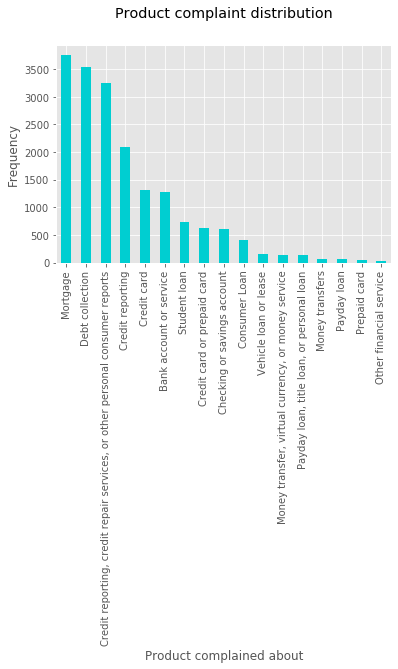

In [29]:
# plot the distribution of complaint by products
bar = df.Product.value_counts().plot(kind='bar', color=['darkturquoise'], label='Product')
plt.title('Product complaint distribution', y=1.1)
plt.ylabel('Frequency')
plt.xlabel('Product complained about')
plt.show()
#plt.savefig('product complaints.png', bbox_inches='tight')

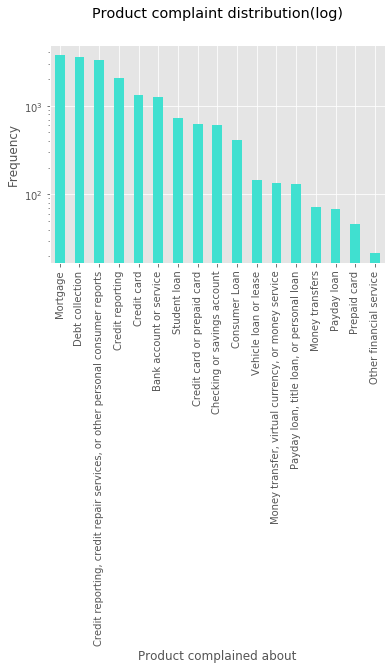

In [30]:
# using log to see the value of financial service and virtual currency

# plot the distribution of complaint by products
barlist = df.Product.value_counts().plot(kind='bar',logy=True, color=['turquoise'], label='Product')
plt.title('Product complaint distribution(log)', y=1.1)
plt.ylabel('Frequency')
plt.xlabel('Product complained about')
plt.show()
#plt.savefig('product complaints log.png', bbox_inches='tight')

In [31]:
df_mapping = df.loc[:,('State','Product')]

df_mapping["Mortgage"]= df_mapping.Product.str.contains("Mortgage")

df_mapping.Mortgage = df_mapping.Mortgage.astype(int)

df_mapping = df_mapping.loc[:,("State","Mortgage")]

df_mapping.head()

#df_mortagage = df.Product="Mortgage"
#df_mortagage

,State,Mortgage
Date_sent_to_company,,
2015-09-08,NJ,0
2019-01-30,NY,0
2015-08-19,CA,1
2016-04-03,NV,0
2013-03-19,PA,1


In [32]:
df_mapping.describe()

,Mortgage
count,18215.00000
mean,0.20571
std,0.40423
min,0.00000
25%,0.00000
50%,0.00000
75%,0.00000
max,1.00000


In [33]:
# get the united states topology  
us_states = os.path.join('us-states.json')
# load the topology
geo_json_data = json.load(open(us_states))

In [34]:
from branca.colormap import linear

colormap = linear.YlGn_06.scale(
    df_mapping.Mortgage.value_counts().min(),
    df_mapping.Mortgage.value_counts().max())

print(colormap(5.0))

#ffffcc


In [35]:
# create a dictionary from the df_mapping dataframe and set its key index to state 
mortgage_dict = df_mapping.set_index('State')['Mortgage']

# print 
mortgage_dict["AL"].head()

AL    1
AL    0
AL    0
AL    1
AL    0
Name: Mortgage, dtype: int32

map the mortgage by state

In [36]:
mortgage_map = folium.Map(location=[43, -100], zoom_start=4)

mortgage_map.choropleth(
    geo_str=open(us_states).read(),
    data=df_mapping,
    columns=['State', 'Mortgage'],
    key_on='feature.id',
    fill_color='YlGn',
)             

AttributeError: module 'folium' has no attribute 'Map'

# Subproduct complained about

In [37]:
# Make a crosstab to count values of Sub product

Subproduct_tab = pd.crosstab(index=df.Sub_product, columns="count_Subproduct")
Subproduct_tab

col_0,count_Subproduct
Sub_product,
(CD) Certificate of deposit,48
Auto,56
Auto debt,41
CD (Certificate of Deposit),13
Cashing a check without an account,15
Check cashing,7
Check cashing service,3
Checking account,1319
Conventional adjustable mortgage (ARM),355


In [38]:
# get sub_product statistics 
Subproduct_tab.describe()

col_0,count_Subproduct
count,71.000000
mean,207.774648
std,445.011403
min,1.000000
25%,14.500000
50%,51.000000
75%,227.500000
max,3183.000000


# complaints Submission_type

In [39]:
df["Complaint_Submission_type"].describe()

count     18215
unique        6
top         Web
freq      13298
Name: Complaint_Submission_type, dtype: object

In [40]:
# get the count of complaints submission by their respective type 
Submission_type_tab = pd.crosstab(index=df.Complaint_Submission_type, columns="Submission_type")
Submission_type_tab

col_0,Submission_type
Complaint_Submission_type,
Email,2
Fax,258
Phone,1033
Postal mail,1034
Referral,2590
Web,13298


In [41]:
# get complaints submission type statistics
Submission_type_tab.describe()

col_0,Submission_type
count,6.000000
mean,3035.833333
std,5107.837367
min,2.000000
25%,451.750000
50%,1033.500000
75%,2201.000000
max,13298.000000


In [42]:
# copy the dataframe, to avoid any data loss or issues
df1 = df
df1.head(2)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees
Date_sent_to_company,,,,,,,,,,,,,,,
2015-09-08,08-09-15,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,NJ,8872,Consent not provided,Web,Closed with non-monetary relief,Yes,No
2019-01-30,01/29/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",NY,10801,Consent not provided,Web,Closed with non-monetary relief,Yes,NaN


In [43]:
# create additional columns that extract individual Complaints Submissions types
df1["EmailSubmission"]= df.Complaint_Submission_type.str.contains("Email")
df1["FaxSubmission"]= df.Complaint_Submission_type.str.contains("Fax")
df1["PhoneSubmission"]= df.Complaint_Submission_type.str.contains("Phone")
df1["PostalSubmission"]= df.Complaint_Submission_type.str.contains("Postal mail")
df1["ReferralSubmission"]= df.Complaint_Submission_type.str.contains("Referral")
df1["WebSubmission"]= df.Complaint_Submission_type.str.contains("Web")

In [44]:
# verify that the dataset has been updated
df1.head(1)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,,,,,,,,,,,,,,,,
2015-09-08,08-09-15,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,NJ,8872,Consent not provided,Web,Closed with non-monetary relief,Yes,No,False,False,False,False,False,True


In [45]:
# create a new data frame  which select individual Complaint submission type
# This will allow easy plotting of the variable Complaint_Submission_type

submitted_via =df1.loc[:,["EmailSubmission","FaxSubmission", "PhoneSubmission","PostalSubmission","ReferralSubmission", "WebSubmission"]]


submitted_via.head()

,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,
2015-09-08,False,False,False,False,False,True
2019-01-30,False,False,False,False,False,True
2015-08-19,False,False,False,False,False,True
2016-04-03,False,False,False,False,False,True
2013-03-19,False,False,False,False,True,False


In [46]:
submitted_via.EmailSubmission = submitted_via.EmailSubmission.astype(int)
submitted_via.FaxSubmission= submitted_via.FaxSubmission.astype(int)
submitted_via.PhoneSubmission= submitted_via.PhoneSubmission.astype(int)
submitted_via.PostalSubmission = submitted_via.PostalSubmission.astype(int)
submitted_via.ReferralSubmission= submitted_via.ReferralSubmission.astype(int)   
submitted_via.WebSubmission= submitted_via.WebSubmission.astype(int)

submitted_via.head(2)

,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,
2015-09-08,0,0,0,0,0,1
2019-01-30,0,0,0,0,0,1


In [47]:
# compute the sum of each individual complaint submission type

EmailSubmission_total=sum(submitted_via.EmailSubmission  ==True)
FaxSubmission_total=sum(submitted_via.FaxSubmission  ==True)
PhoneSubmission_total=sum(submitted_via.PhoneSubmission ==True)
PostalSubmission_total=sum(submitted_via.PostalSubmission ==True)
ReferralSubmission_total=sum(submitted_via.ReferralSubmission ==True)
WebSubmission_total=sum(submitted_via.WebSubmission == True)

In [48]:
# create a dictionary which keys correspond to the type of complaint submission
# and the values as total number of each individual complaint submission type  

submitted_via1 = {"EmailSubmission": EmailSubmission_total, "FaxSubmission": FaxSubmission_total, "PhoneSubmission": PhoneSubmission_total, 
        "PostalSubmission": PostalSubmission_total, "ReferralSubmission": ReferralSubmission_total, "WebSubmission": WebSubmission_total}

In [49]:
# This data is ready to be plotted(variable complaint submission type )
submitted_via1

{'EmailSubmission': 2,
 'FaxSubmission': 258,
 'PhoneSubmission': 1033,
 'PostalSubmission': 1034,
 'ReferralSubmission': 2590,
 'WebSubmission': 13298}

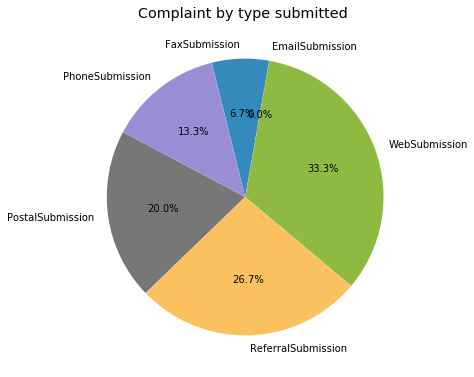

<Figure size 432x288 with 0 Axes>

In [50]:
# Pie chart visualization 
# explode must be len(x) sequence or None
# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.2, 0.2, 0.8, 0.8])
labels = 'EmailSubmission','FaxSubmission','PhoneSubmission','PostalSubmission','ReferralSubmission','WebSubmission'
explode =(0.001, 0.001, 0.001, 0.001, 0.001, 0.001)
piechart =plt.pie(range(len(submitted_via1 )),explode=explode,labels=labels,autopct='%1.1f%%',startangle=80)
title('Complaint by type submitted ')
show(piechart)
#pdf.savefig()
savefig('Complaint by type submitted', bbox_inches='tight')

# sub product

In [51]:
#Company_response_to_consumer
Subproduct_tab = pd.crosstab(index=df.Sub_product, columns="count_Subproduct")
Subproduct_tab

col_0,count_Subproduct
Sub_product,
(CD) Certificate of deposit,48
Auto,56
Auto debt,41
CD (Certificate of Deposit),13
Cashing a check without an account,15
Check cashing,7
Check cashing service,3
Checking account,1319
Conventional adjustable mortgage (ARM),355


In [52]:
df.Sub_product.describe()

count                14752
unique                  71
top       Credit reporting
freq                  3183
Name: Sub_product, dtype: object

In [53]:
# get the count of Consumer disagreement with the company response

Sub_product_tab = pd.crosstab(index=df.Sub_product, columns="count_Consumer_disagreement")
Sub_product_tab

col_0,count_Consumer_disagreement
Sub_product,
(CD) Certificate of deposit,48
Auto,56
Auto debt,41
CD (Certificate of Deposit),13
Cashing a check without an account,15
Check cashing,7
Check cashing service,3
Checking account,1319
Conventional adjustable mortgage (ARM),355


In [54]:
# get the subproduct variable statistics 
Sub_product_tab

col_0,count_Consumer_disagreement
Sub_product,
(CD) Certificate of deposit,48
Auto,56
Auto debt,41
CD (Certificate of Deposit),13
Cashing a check without an account,15
Check cashing,7
Check cashing service,3
Checking account,1319
Conventional adjustable mortgage (ARM),355


# Company

In [55]:
df["Company"].describe()

count             18215
unique             1291
top       EQUIFAX, INC.
freq               1640
Name: Company, dtype: object

In [56]:
# get the count of the companies that people are complaining about


Company_tab = pd.crosstab(index=df.Company, columns="count_company")
Company_tab

col_0,count_company
Company,
"(Former)Shapiro, Swertfeger & Hasty, LLP",1
"1st Capital Finance of South Carolina, Inc.",1
1st Fidelity Loan Servicing,1
1st Franklin Financial Corporation,1
21ST MORTGAGE CORP.,4
2288984 Ontario Inc.,1
360 MORTGAGE GROUP LLC,1
"A.R.M. Solutions, Inc.",3
"AAA Auto Title Loans, LLC",1


In [57]:
Company_tab.describe()

col_0,count_company
count,1291.000000
mean,14.109218
std,97.038247
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,1640.000000


In [58]:
# get the company that received most complaints
most_complained_company = df.Company.value_counts().max()
most_complained_company

1640

In [59]:
# get the top 10 companies that received most complaints order by the highest one
top_10_complaint_by_company =df.Company.value_counts().nlargest(10)
top_10_complaint_by_company

EQUIFAX, INC.                             1640
Experian Information Solutions Inc.       1563
TRANSUNION INTERMEDIATE HOLDINGS, INC.    1441
BANK OF AMERICA, NATIONAL ASSOCIATION     1242
WELLS FARGO & COMPANY                     1046
JPMORGAN CHASE & CO.                       944
CITIBANK, N.A.                             732
CAPITAL ONE FINANCIAL CORPORATION          513
Navient Solutions, LLC.                    437
SYNCHRONY FINANCIAL                        302
Name: Company, dtype: int64

In [60]:
# mean 
means = df1.Company.value_counts().mean()

#standard deviation
errors = df1.Company.value_counts().std()

In [61]:
# print both the mean and the standard deviation
print (means)
print(errors)

14.109217660728119
97.03824707602955


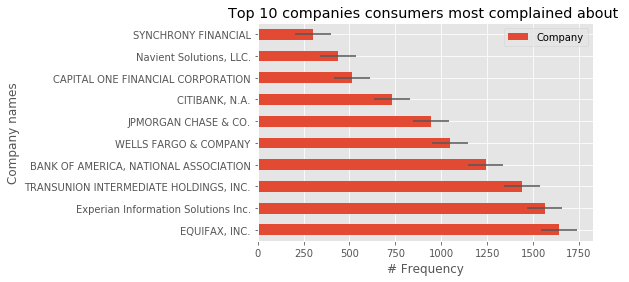

In [62]:
top_10_complaint_by_company.plot(kind='barh',xerr=errors)


plt.xlabel('# Frequency')
plt.ylabel('Company names')
plt.title('Top 10 companies consumers most complained about ')
plt.legend(loc='upper right')
plt.show()

In [63]:
# top 10 companies consumers least complained about
_10_least_complaint =df.Company.value_counts().nsmallest(10)
_10_least_complaint

Eagle Financial Services, Inc.                            1
American Student Assistance                               1
First Credit Services Inc.                                1
MEMBER FIRST MORTGAGE, LLC                                1
United Collection Service Inc (Closed)                    1
Mid-Atlantic Finance Co., Inc.                            1
Sher & Shabsin PC                                         1
Richland Bureau of Credits Medical Service Bureau Inc.    1
Law Offices of Robert J. Colclough, III                   1
Capital Markets Cooporative, LLC                          1
Name: Company, dtype: int64

In [64]:
# create a new df with product and company as variables using loc
newDf = df.loc[:,('Product','Company')]
newDf.head(3)
#print("now that the df has been created, a selection must be apply so that Bank of American and debt collection values can be analysed")

,Product,Company
Date_sent_to_company,,
2015-09-08,Credit reporting,Experian Information Solutions Inc.
2019-01-30,"Credit reporting, credit repair services, or o...","EQUIFAX, INC."
2015-08-19,Mortgage,WELLS FARGO & COMPANY


In [65]:
# add new variables the the dataframe 
newDf["Bank_of_America"] = newDf["Company"].str.contains("Bank of America")
newDf["debt_Collection"] = newDf["Product"].str.contains("Debt collection")
newDf.head(1)

,Product,Company,Bank_of_America,debt_Collection
Date_sent_to_company,,,,
2015-09-08,Credit reporting,Experian Information Solutions Inc.,False,False


In [66]:
# drop the unnecessary variables
variableToDrop = ['Product', 'Company']

# Verify whether there are some missing values(nan) in the postcode field, then drop those
newDf= newDf.drop(variableToDrop,1)


newDf.head(1)

,Bank_of_America,debt_Collection
Date_sent_to_company,,
2015-09-08,False,False


In [67]:

# discretise the values in both variable 
newDf.Bank_of_America = newDf.Bank_of_America.astype(int)    # discretise the values in both variable bank of america
newDf.debt_Collection = newDf.debt_Collection.astype(int)    # discretise the values in both variable debt collection

newDf.head()                                                # printout the data sample

,Bank_of_America,debt_Collection
Date_sent_to_company,,
2015-09-08,0,0
2019-01-30,0,0
2015-08-19,0,0
2016-04-03,0,0
2013-03-19,0,0


In [68]:
newDf['weekday'] = newDf.index.weekday

newDf.head(1)

,Bank_of_America,debt_Collection,weekday
Date_sent_to_company,,,
2015-09-08,0,0,1


In [69]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
newDf['weekday'] = newDf['weekday'].map(lambda x: days[x])
newDf.head(1)

,Bank_of_America,debt_Collection,weekday
Date_sent_to_company,,,
2015-09-08,0,0,Tuesday


In [70]:
debt_table = pd.crosstab(index=newDf["weekday"], 
                          columns=newDf["debt_Collection"])

debt_table

debt_Collection,0,1
weekday,,
Friday,2274,561
Monday,2294,556
Saturday,1237,301
Sunday,1170,271
Thursday,2485,587
Tuesday,2572,639
Wednesday,2639,629


In [71]:
debt_table.describe()

debt_Collection,0,1
count,7.000000,7.000000
mean,2095.857143,506.285714
std,624.365125,153.922832
min,1170.000000,271.000000
25%,1755.500000,428.500000
50%,2294.000000,561.000000
75%,2528.500000,608.000000
max,2639.000000,639.000000


In [72]:
Americabank_debt_table = pd.crosstab(index=newDf["weekday"], 
                          columns=newDf["Bank_of_America"])

Americabank_debt_table

Bank_of_America,0
weekday,
Friday,2835
Monday,2850
Saturday,1538
Sunday,1441
Thursday,3072
Tuesday,3211
Wednesday,3268


No handles with labels found to put in legend.


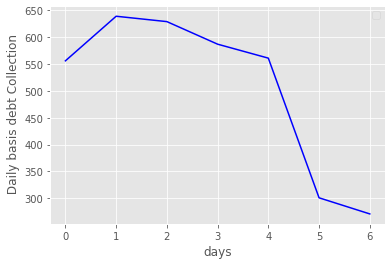

In [73]:
dailycollection = newDf["debt_Collection"].groupby(newDf.index.weekday).aggregate(np.sum)

plt.plot(dailycollection,color='blue' )
plt.xlabel('days')
plt.ylabel(' Daily basis debt Collection')
plt.legend(loc='upper right')
plt.show()

In [74]:
df = df.dropna(subset=["Timely_response_yes_no"])

In [75]:
df["Timely_response_yes_no"].describe()

count     18215
unique        2
top         Yes
freq      17774
Name: Timely_response_yes_no, dtype: object

In [76]:
# count yes or no 
#Timely response?(yes/no)
Timely_response_tab = pd.crosstab(index=df.Timely_response_yes_no, columns="count_Timely_response")
Timely_response_tab

col_0,count_Timely_response
Timely_response_yes_no,
No,441
Yes,17774


In [77]:
Timely_response_tab.describe()

col_0,count_Timely_response
count,2.000000
mean,9107.500000
std,12256.281838
min,441.000000
25%,4774.250000
50%,9107.500000
75%,13440.750000
max,17774.000000


In [78]:
# create additional columns to extract the boolean yes,no
df1["YesTimelyresponse"]= df1.Timely_response_yes_no.str.contains("Yes")
df1["NoTimelyresponse"]= df1.Timely_response_yes_no.str.contains("No")

In [79]:
df1.YesTimelyresponse = df1.YesTimelyresponse.astype(int)
df1.NoTimelyresponse = df1.NoTimelyresponse.astype(int)

In [80]:
# create a new data frame  which select individual Complaint submission type
# This will allow easy plotting of the variable Complaint_Submission_type

df_comp_resp=df1.loc[:,["YesTimelyresponse","NoTimelyresponse"]]


df_comp_resp.head(2)

,YesTimelyresponse,NoTimelyresponse
Date_sent_to_company,,
2015-09-08,1,0
2019-01-30,1,0


No handles with labels found to put in legend.


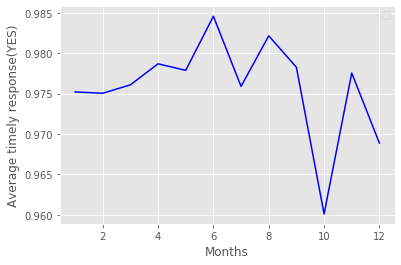

No handles with labels found to put in legend.


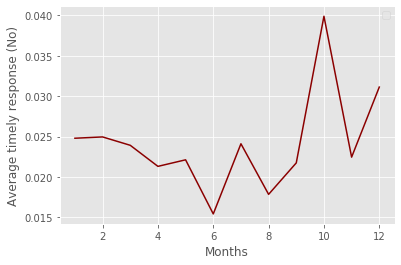

In [81]:
monthMeans = df_comp_resp["YesTimelyresponse"].groupby(df_comp_resp.index.month).aggregate(np.mean)

plt.plot(monthMeans,color='blue' )
plt.xlabel('Months')
plt.ylabel('Average timely response(YES)')
plt.legend(loc='upper right')
plt.show()


monthMeans1 = df_comp_resp["NoTimelyresponse"].groupby(df_comp_resp.index.month).aggregate(np.mean)
plt.plot(monthMeans1,color='darkred')
plt.xlabel('Months')
plt.ylabel('Average timely response (No)')
plt.legend(loc='upper right')
plt.show()

No handles with labels found to put in legend.


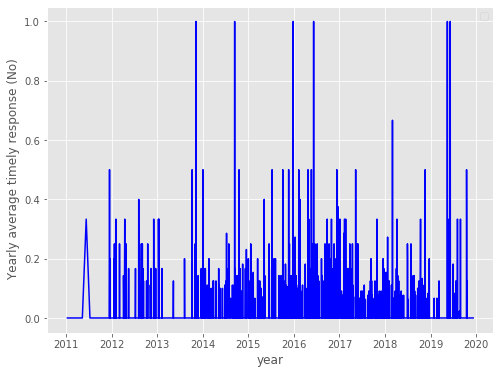

In [82]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]

 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size



monthMeans1 = df_comp_resp["NoTimelyresponse"].groupby(df_comp_resp.index).aggregate(np.mean)
plt.plot(monthMeans1,color='blue')
plt.xlabel('year')
plt.ylabel(' Yearly average timely response (No)')
plt.legend(loc='upper right')
plt.show()
#savefig('Yearly average timely response.png')

In [83]:
df["issue"].describe()

count                                    18215
unique                                     150
top       Incorrect information on your report
freq                                      1948
Name: issue, dtype: object

# issue

In [84]:
Issue_tab = pd.crosstab(index=df.issue, columns="count_issue")
Issue_tab

col_0,count_issue
issue,
APR or interest rate,92
"Account opening, closing, or management",592
Account terms and changes,13
Adding money,3
Advertising,1
Advertising and marketing,45
"Advertising and marketing, including promotional offers",44
"Advertising, marketing or disclosures",1
Application processing delay,7


In [85]:
Issue_tab.describe()

col_0,count_issue
count,150.000000
mean,121.433333
std,277.241503
min,1.000000
25%,6.000000
50%,30.500000
75%,80.000000
max,1948.000000


In [86]:
# get the top 5 issues people complianed about
top_5_complaint_issue =df1.issue.value_counts().nlargest(5)
top_5_complaint_issue

Incorrect information on your report        1948
Loan modification,collection,foreclosure    1554
Incorrect information on credit report      1528
Loan servicing, payments, escrow account    1024
Cont'd attempts collect debt not owed        900
Name: issue, dtype: int64

In [87]:
top_5_complaint_issue.describe()

count       5.000000
mean     1390.800000
std       427.597007
min       900.000000
25%      1024.000000
50%      1528.000000
75%      1554.000000
max      1948.000000
Name: issue, dtype: float64

In [88]:
# mean 
means1 = df1.issue.value_counts().mean()

#standard deviation of issues
errors1 = df1.issue.value_counts().std()

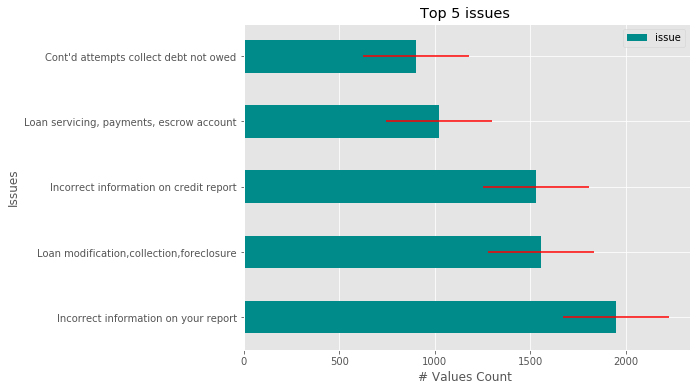

In [89]:
top_5_complaint_issue.plot(kind='barh',color='darkcyan',xerr=errors1,ecolor='r')


plt.xlabel('# Values Count ')
plt.ylabel('Issues')
plt.title('Top 5 issues ')
plt.legend(loc='upper right')
plt.show()

# creating a series

In [90]:
state_filter = ((df["Product"] == "Credit card" ) & 
                   (df["State"] == "CA" ))
                   

# Let's make a copy to work with a new, clean block of memory 
# (if you are interested, try and remove the copy to see the consequences further down...)
CA_Creditcard =df[state_filter].copy()
#european_stations["Country"].unique()
CA_Creditcard.head(1)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,,,,,,,,,,,,,,,,
2017-02-21,02/21/2017,Credit card,NaN,Transaction issue,NaN,I booked a ticket for XXXX XXXX. XXXX changed ...,NaN,AMERICAN EXPRESS COMPANY,CA,945XX,Consent provided,Web,Closed with explanation,Yes,No,False,False,False,False,False,True


In [91]:
CAcrdedit_card = CA_Creditcard.loc[:,("Product", "State") ]

In [92]:
CAcrdedit_card.describe()

,Product,State
count,190,190
unique,1,1
top,Credit card,CA
freq,190,190


In [93]:
state_filter = ((df["Product"] == "Credit card" ) & 
                   (df["State"] == "MT" ))
                   

# Let's make a copy to work with a new, clean block of memory 
# (if you are interested, try and remove the copy to see the consequences further down...)
MT_Creditcard =df[state_filter].copy()
#european_stations["Country"].unique()
MT_Creditcard.head(1)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,,,,,,,,,,,,,,,,
2013-06-12,12-06-13,Credit card,NaN,Delinquent account,NaN,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,MT,598XX,NaN,Web,Closed with non-monetary relief,Yes,No,False,False,False,False,False,True


In [94]:
MTcrdedit_card = MT_Creditcard.loc[:,("Product", "State") ]

In [95]:
MTcrdedit_card.describe()

,Product,State
count,3,3
unique,1,1
top,Credit card,MT
freq,3,3


In [96]:
company_filter = ((df["Product"] == "Credit card" ) & 
                   (df["Company"] == "Bank of America" ))
                   

# Let's make a copy to work with a new, clean block of memory 
# (if you are interested, try and remove the copy to see the consequences further down...)
Creditcard =df[company_filter].copy()
#european_stations["Country"].unique()
Creditcard.head(1)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,,,,,,,,,,,,,,,,


In [97]:
BoACreditcard = Creditcard.loc[:,("Product", "Company") ]

In [98]:
# get the dummies value
BoACreditcard = pd.get_dummies( BoACreditcard)
BoACreditcard.head()

""
Date_sent_to_company
